<a href="https://colab.research.google.com/github/MHHamdan/Advanced-Deep-Learning-with-Keras/blob/master/yolov1_darknet_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

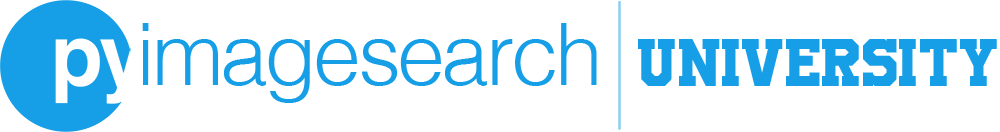

# Understanding a Real-Time Object Detection Network: You Only Look Once (YOLOv1)
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch University](https://pyimg.co/university)** Jupyter Notebooks!

This notebook is associated with the [Understanding a Real-Time Object Detection Network: You Only Look Once (YOLOv1)](https://pyimg.co/3cpmz) blog post published on 2022-04-11.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch University Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2022 OptiReto, LLC and PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch University at https://pyimg.co/university today.*

### Clone the Darknet repository

In [2]:
!git clone https://github.com/PyImageSearch/darknet
%cd darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15418, done.
remote: Total 15418 (delta 0), reused 0 (delta 0), pack-reused 15418
Receiving objects: 100% (15418/15418), 14.05 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (10358/10358), done.
/content/darknet/darknet


In [3]:
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/g' Makefile

In [4]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/

### Download pre-trained YoloV1 model

In [5]:
!wget https://pjreddie.com/media/files/yolov1/yolov1.weights

--2022-06-21 16:58:33--  https://pjreddie.com/media/files/yolov1/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: ‘yolov1.weights’

yolov1.weights      100%[===================>] 752.75M  65.9MB/s    in 12s     

2022-06-21 16:58:45 (65.1 MB/s) - ‘yolov1.weights’ saved [789312988/789312988]



### Download sample video

In [6]:
!wget https://colab-notebook-videos.s3.us-west-2.amazonaws.com/guitar.mp4

--2022-06-21 16:58:45--  https://colab-notebook-videos.s3.us-west-2.amazonaws.com/guitar.mp4
Resolving colab-notebook-videos.s3.us-west-2.amazonaws.com (colab-notebook-videos.s3.us-west-2.amazonaws.com)... 52.218.242.9
Connecting to colab-notebook-videos.s3.us-west-2.amazonaws.com (colab-notebook-videos.s3.us-west-2.amazonaws.com)|52.218.242.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6586164 (6.3M) [video/mp4]
Saving to: ‘guitar.mp4’

guitar.mp4          100%[===================>]   6.28M  13.3MB/s    in 0.5s    

2022-06-21 16:58:46 (13.3 MB/s) - ‘guitar.mp4’ saved [6586164/6586164]



### Function to display images in Jupyter Notebooks and Google Colab

In [7]:
# import necessary packages
from matplotlib import pyplot as plt
import cv2

def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Running inference on sample image

In [8]:
!python3 darknet_images.py --input data/horses.jpg --weights yolov1.weights --config_file cfg/yolov1/yolo.cfg --data_file ./cfg/voc.data --dont_show

 Try to load cfg: cfg/yolov1/yolo.cfg, weights: yolov1.weights, clear = 0 
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     64       7 x 7/ 2    448 x 448 x   3 ->  224 x 224 x  64 0.944 BF
   1 max                2x 2/ 2    224 x 224 x  64 ->  112 x 112 x  64 0.003 BF
   2 conv    192       3 x 3/ 1    112 x 112 x  64 ->  112 x 112 x 192 2.775 BF
   3 max                2x 2/ 2    112 x 112 x 192 ->   56 x  56 x 192 0.002 BF
   4 conv    128       1 x 1/ 1     56 x  56 x 192 ->   56 x  56 x 128 0.154 BF
   5 conv    256       3 x 3/ 1     56 x  56 x 128 ->   56 x  56 x 256 1.850 BF
   6 conv    256       1 x 1/ 1     56 x  56 x 256 ->   56 x  56 x 256 0.411 BF
   7 conv    512       3 x 3/ 1     56 x  56 x 256 ->   56 x  56 x 512 7.399 BF
   8 max                2x 

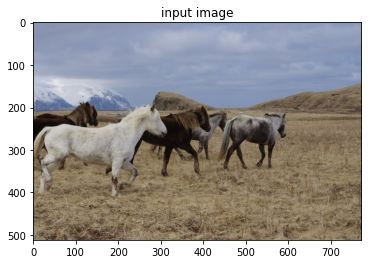

In [9]:
#@title Input Image
image = cv2.imread("data/horses.jpg")
plt_imshow("input image", image)

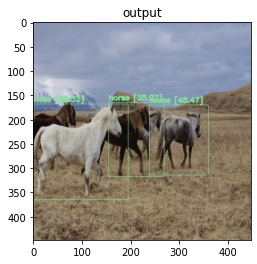

In [10]:
#@title Display output image
image = cv2.imread("output_0.png")
plt_imshow("output", image)

In [11]:
!python darknet_video.py --input guitar.mp4 --weights yolov1.weights --config_file cfg/yolov1/yolo.cfg --data_file ./cfg/voc.data --dont_show --out_filename output.mp4

 Try to load cfg: cfg/yolov1/yolo.cfg, weights: yolov1.weights, clear = 0 
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     64       7 x 7/ 2    448 x 448 x   3 ->  224 x 224 x  64 0.944 BF
   1 max                2x 2/ 2    224 x 224 x  64 ->  112 x 112 x  64 0.003 BF
   2 conv    192       3 x 3/ 1    112 x 112 x  64 ->  112 x 112 x 192 2.775 BF
   3 max                2x 2/ 2    112 x 112 x 192 ->   56 x  56 x 192 0.002 BF
   4 conv    128       1 x 1/ 1     56 x  56 x 192 ->   56 x  56 x 128 0.154 BF
   5 conv    256       3 x 3/ 1     56 x  56 x 128 ->   56 x  56 x 256 1.850 BF
   6 conv    256       1 x 1/ 1     56 x  56 x 256 ->   56 x  56 x 256 0.411 BF
   7 conv    512       3 x 3/ 1     56 x  56 x 256 ->   56 x  56 x 512 7.399 BF
   8 max                2x 

To view the video please download the `output.mp4` file from the left side menu (as displayed in the following image) and play it on your local machine. 

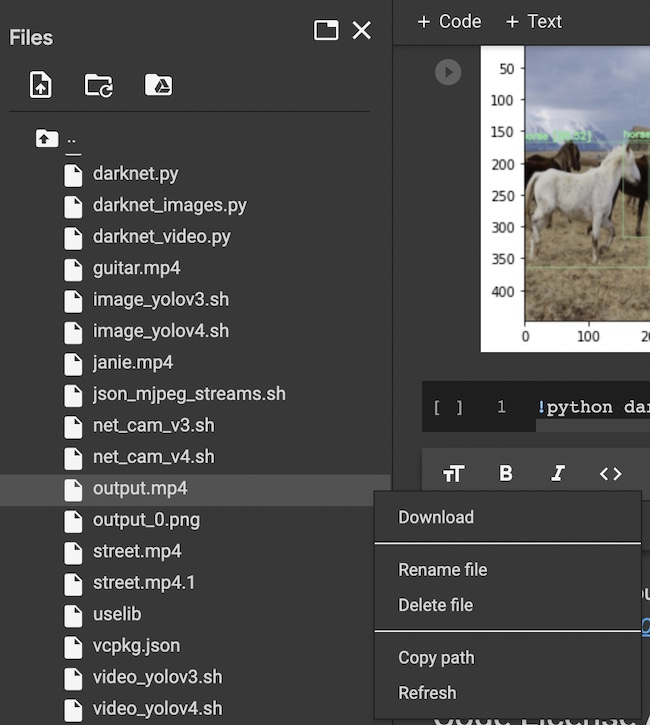

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Understanding a Real-Time Object Detection Network: You Only Look Once (YOLOv1)*](https://pyimg.co/3cpmz) published on 2022-04-11.

# Code License Agreement
```
Copyright (c) 2021 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from OptiReto, LLC and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```